# Assignment 3

In [71]:
import networkx as nx
from networkx.readwrite.gml import read_gml
from networkx.algorithms import degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality
from networkx.algorithms.smallworld import random_reference
from networkx.algorithms.assortativity import average_degree_connectivity, degree_pearson_correlation_coefficient
from networkx.algorithms.cluster import clustering
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict
from scipy.stats import pearsonr, spearmanr, kendalltau


## A03.1

### Utility functions

In [118]:

def plot_centralities(graphs: Dict[str,nx.Graph]):
    degrees = {}
    closenesses = {}
    betweennesses = {}
    eigenvectors = {}
    for key, value in graphs.items():
        degrees[key] = list(degree_centrality(value).values())
        closenesses[key] = list(closeness_centrality(value).values())
        betweennesses[key] = list(betweenness_centrality(value).values())
        eigenvectors[key] = list(eigenvector_centrality(value).values())
        

    plot_scatter(degrees,closenesses,"closeness~degree")
    plot_scatter(degrees,betweennesses,"betweenness~degree")
    plot_scatter(degrees,eigenvectors,"eigenvector~degree")
    plot_scatter(closenesses,betweennesses,"betweenness~closeness")
    plot_scatter(closenesses,eigenvectors,"eigenvector~closeness")
    plot_scatter(eigenvectors,betweennesses,"betweenness~eigenvector")
    
    

def plot_scatter(xs, ys, title: str):
    keys = list(xs.keys())
    fig, axs = plt.subplots(1,3,figsize=(28,10))
    fig.suptitle(title)
    max_x = 0
    min_x = 99
    max_y = 0
    min_y = 0
    for i in range(len(xs)):
        key = keys[i]
        x = xs[key]
        y = ys[key]
        ax = axs[i]

        if max_x < max(x):
            max_x = max(x)
        if max_y < max(y):
            max_y = max(y)

        if min_x > min(x):
            min_x = min(x)
        if min_y > min(y):
            min_y = min(y)

        labels = title.split("~")

        pearson = pearsonr(x, y)
        spearman = spearmanr(x, y)
        kendall = kendalltau(x, y)

        text = f"pearson: {pearson[0]}\nspearman: {spearman[0]}\nkendall: {kendall[0]}"
        ax.scatter(x, y)
        ax.set_title(f"{key}")
        ax.set_xlabel(labels[1])
        ax.set_ylabel(labels[0])

        ax.text(0.5,-0.2,text,ha="center",transform=ax.transAxes)

    for ax in axs:
        ax.set_xlim(min_x-0.01,max_x+0.01)
        ax.set_ylim(min_y-0.01,max_y+0.01)
    print(min_x, max_x)
    print(min_y, max_y)
    plt.show()


0.000819000819000819 0.5076142131979695
0 0.6480263157894737


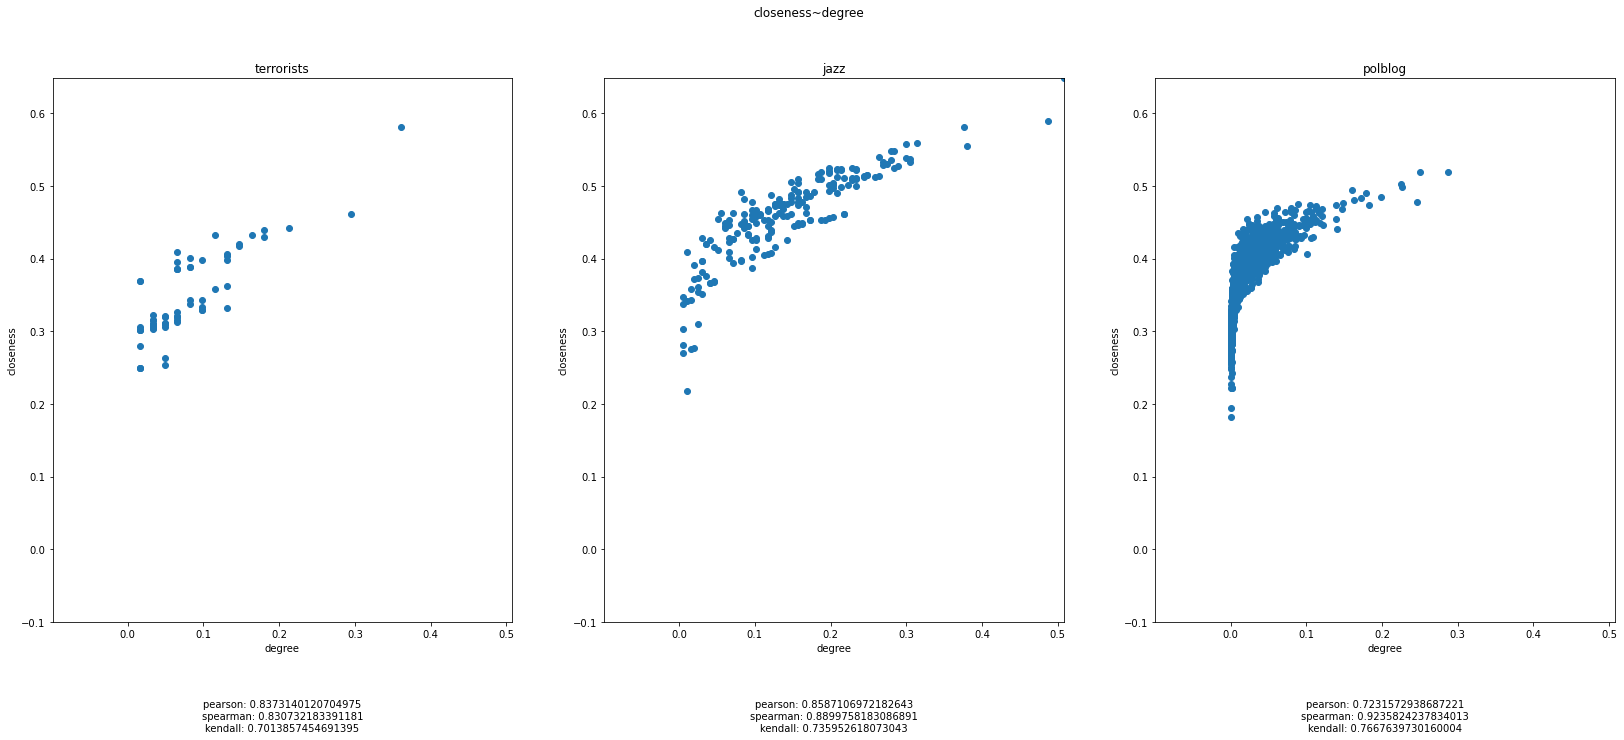

0.000819000819000819 0.5076142131979695
0 0.5870030455276356


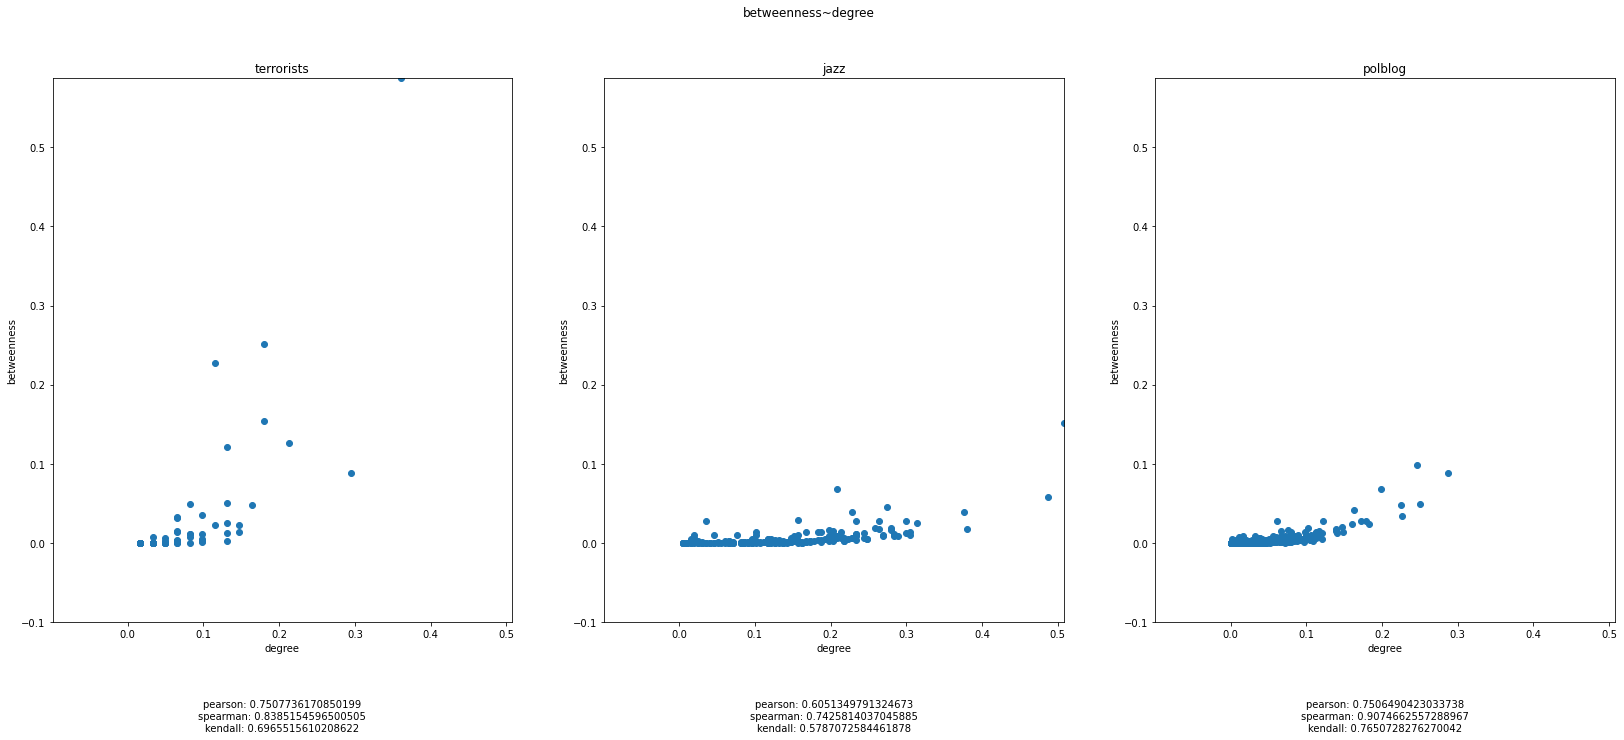

0.000819000819000819 0.5076142131979695
0 0.41250603258459584


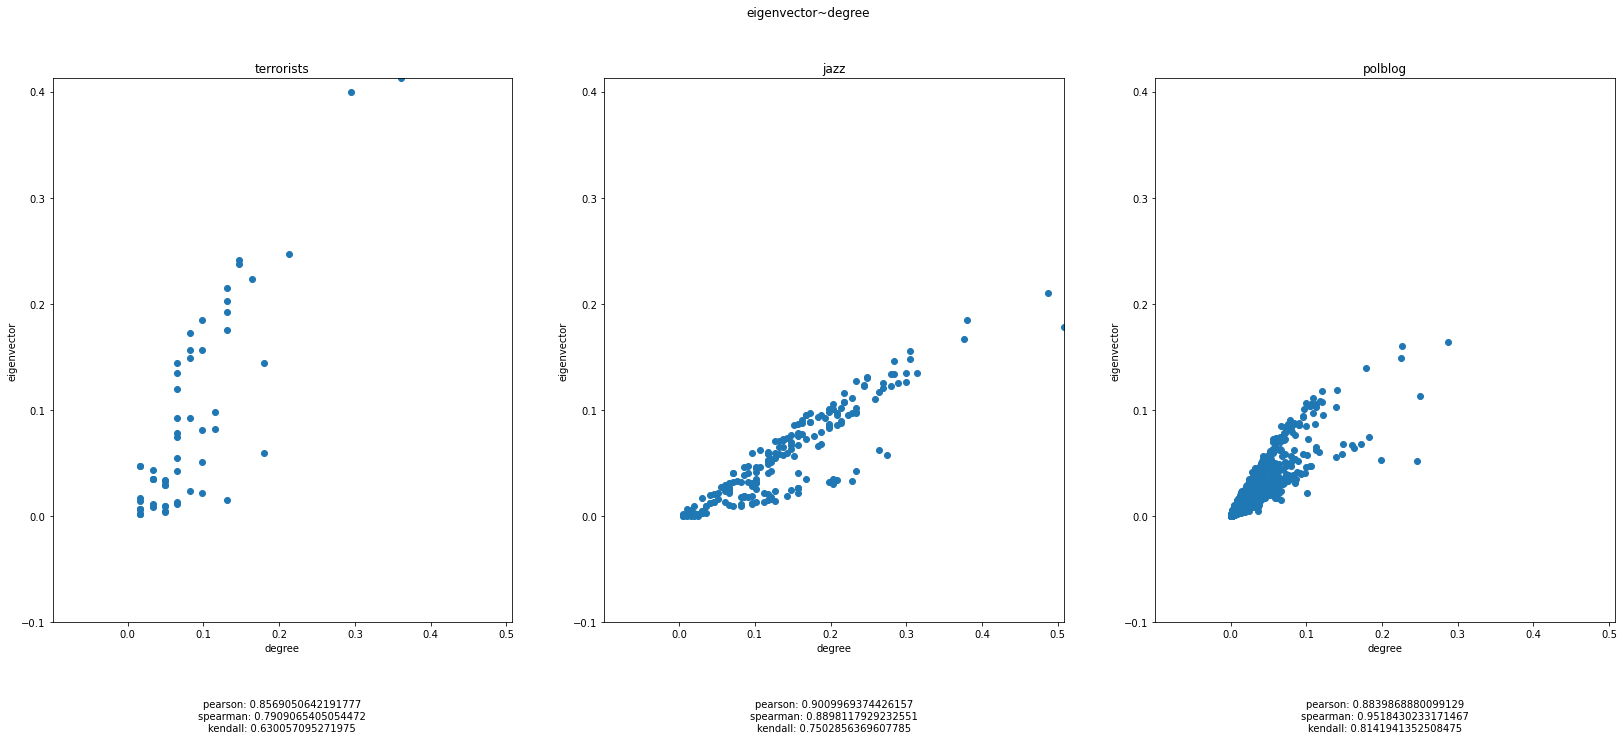

0.18172347075457657 0.6480263157894737
0 0.5870030455276356


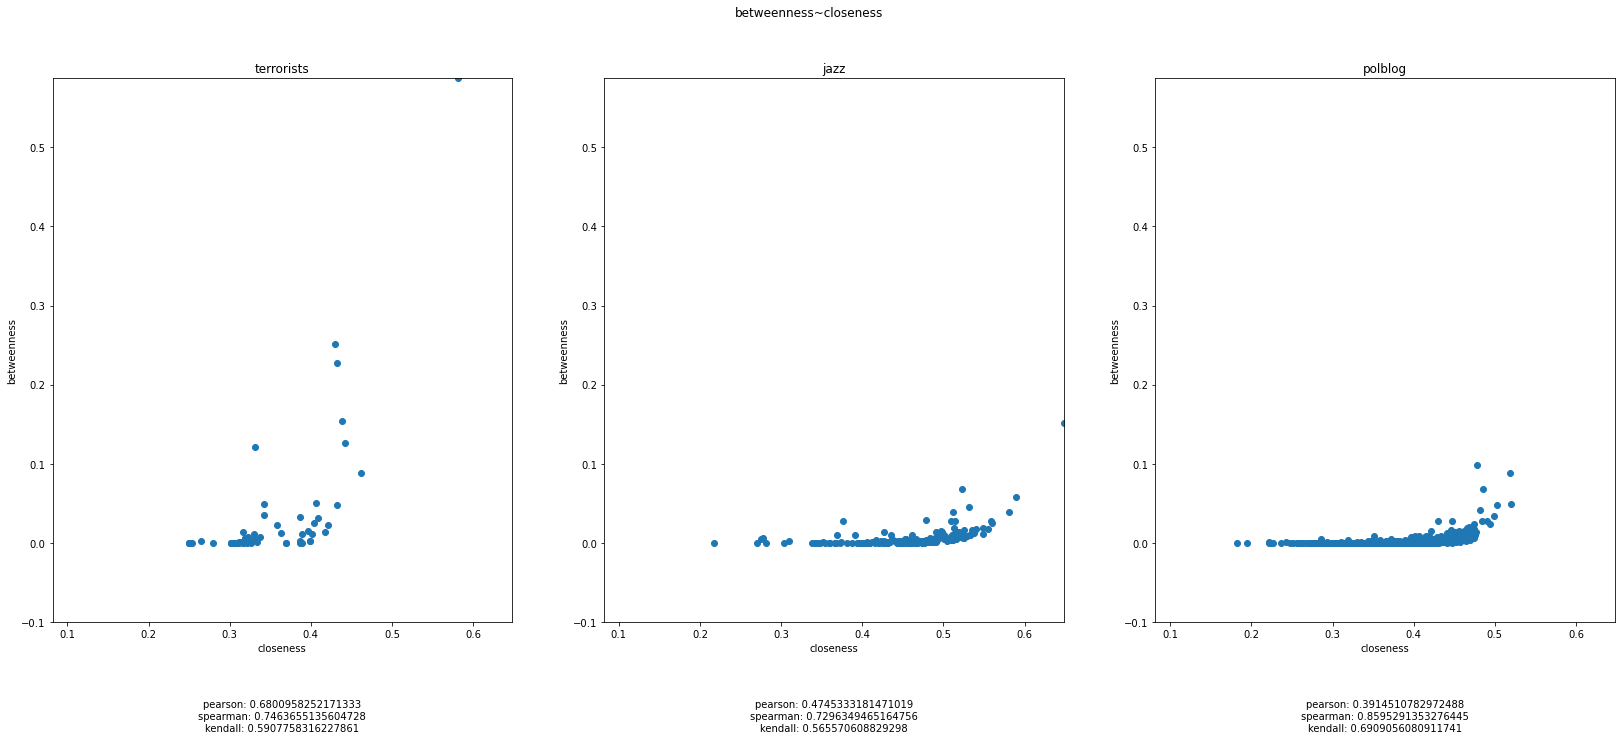

0.18172347075457657 0.6480263157894737
0 0.41250603258459584


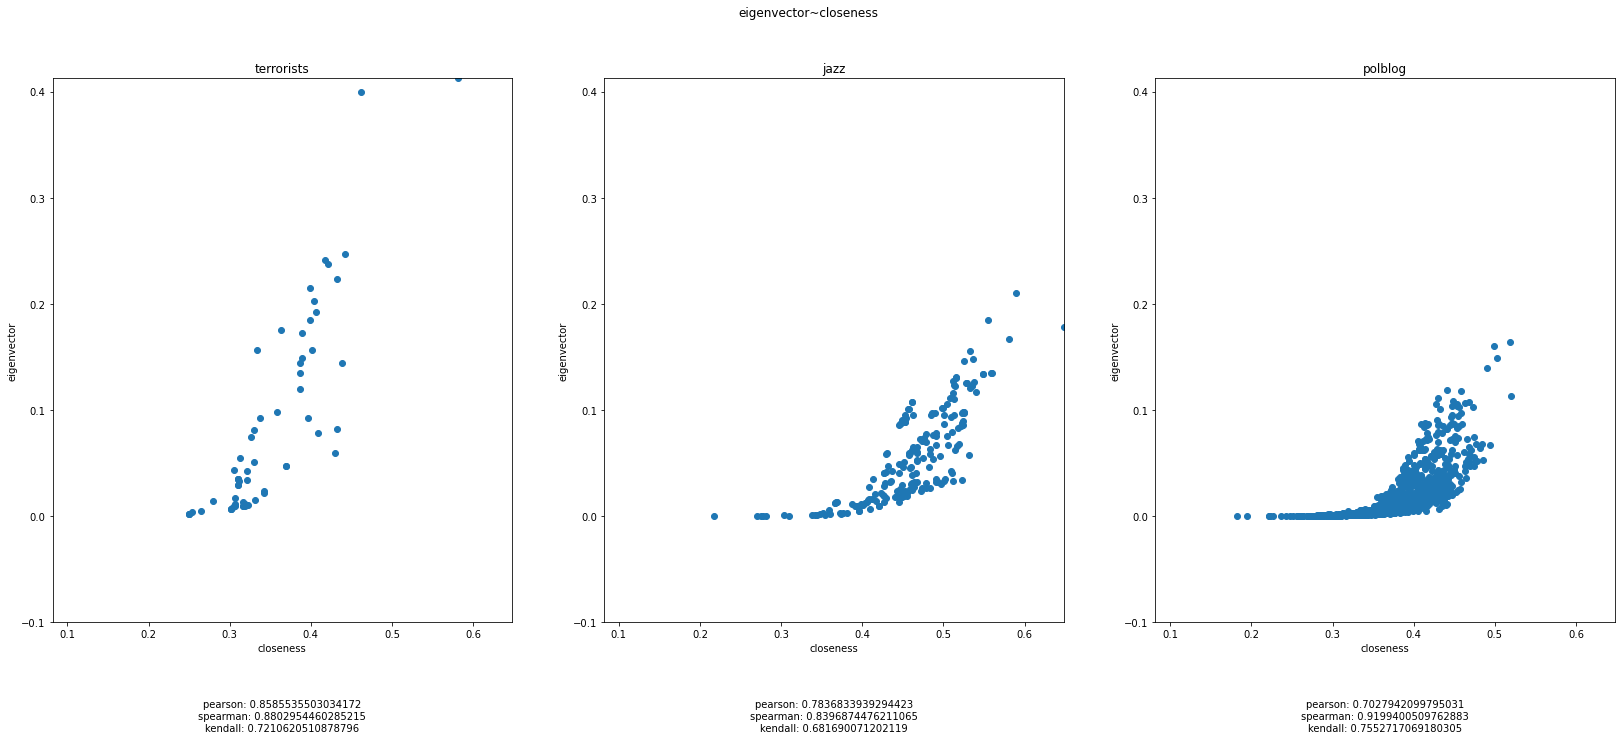

1.5451698984148958e-08 0.41250603258459584
0 0.5870030455276356


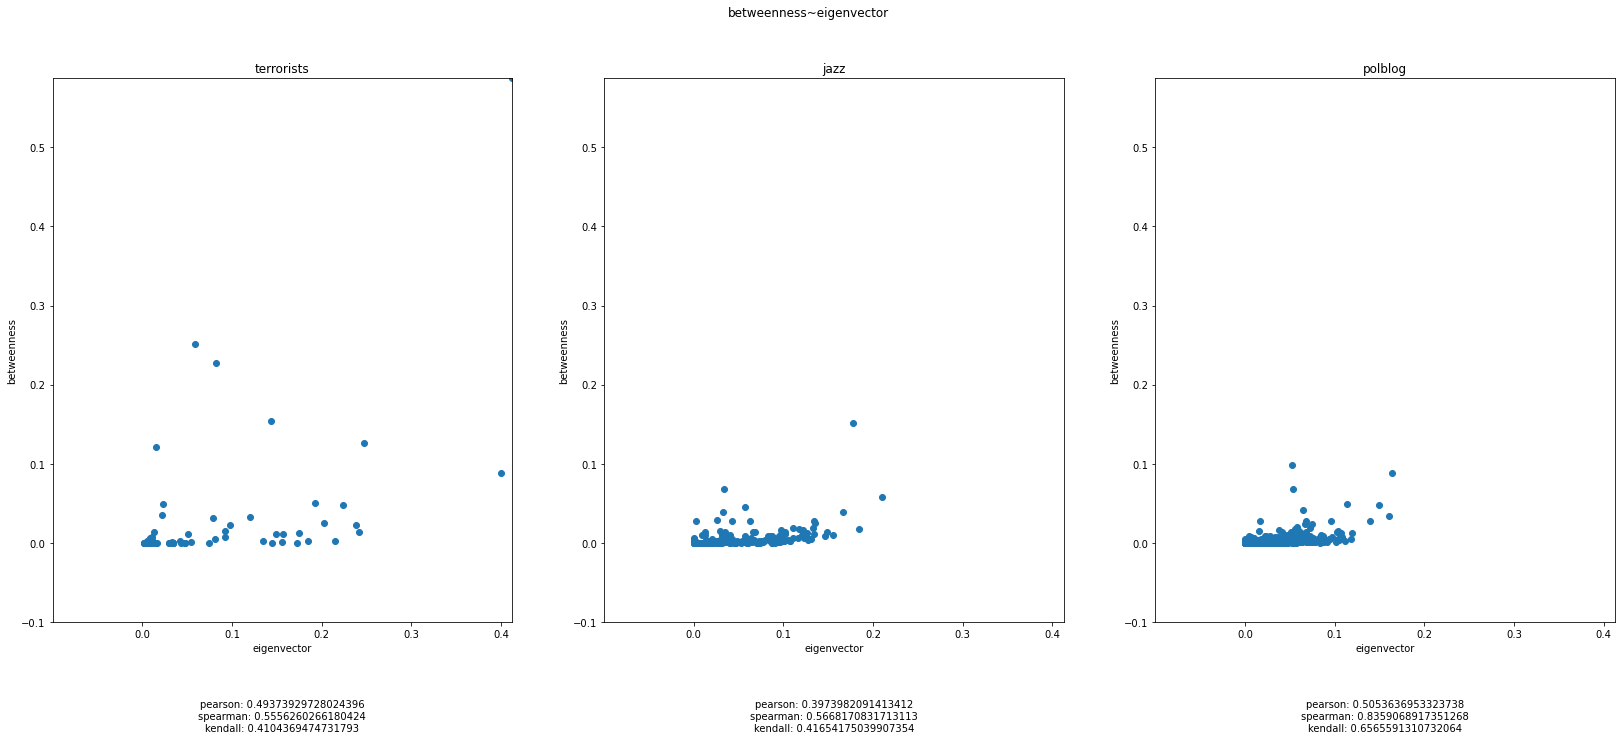

In [119]:
graphs = {}
graphs["terrorists"] = read_gml("data/graph_terrorists.gml")
graphs["jazz"] = read_gml("data/graph_jazz_collab.gml")
graphs["polblog"] = read_gml("data/graph_polblog.gml")
plot_centralities(graphs)